<h1> Kaggle Challenge 1 ->  Titanic: Machine Learning from Disaster

Vamos a analizar un ejemplo sencillo para aprender a limpiar nuestros datos y aplicar un par de modelos de Machine Learning para el reto del Titanic!

Toda la info está aquí: https://www.kaggle.com/c/titanic

En este reto, tenemos los datos necesarios para predecir, si una persona sobrevivirá a la muerte dada por el accidente del Titanic o not.


De la misma web de kaggle/titanic descargamos nuestro set de datos -> https://www.kaggle.com/c/titanic/data
para empezar solo el .csv de train, donde están los datos que nos permitirán entrenar a nuestros modelos.

Utilizaremos python y algunas librerías para leer datos, crear modelos, etc.

<h2> El procedimiento: </h2>

* Análisis y limpieza de datos
* Construir nuestro modelo de predicción (Machine Learning)
* Evaluar el modelo y calidad de predicción

<h3> Análisis y limpieza de datos

In [1]:
# librería para leer y manipular los datos
import numpy as np
import pandas as pd

In [2]:
# librerías para machine learning
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# librerías para las gráficas
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

Vamos a cargar los datos utilizando la librería **pandas**

In [4]:
# el data set de training .csv esta en una carpetea titanic
df_original = pd.read_csv("titanic/train.csv")

In [5]:
# veamos que info hay... 
df_original.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Viendo la info dentro de nuestro set de datos, podemos empezar a hacernos preguntas que nos ayudarán a dirigir nuestro principal objetivo de este reto: **probabilidad de sobrevivir del hundimiento del Titanic**

Preguntas como:
* *hay una relación entre la edad de las personas que sobrevivieron?*
* *es importante el tipo de ticket para sobrevivir?*
* *hay más probabilidad de sobrevivir si eres mujer?*


Analizando la info que tenemos en el set de datos y estas preguntas, podemos reducir el número de columnas debido a su no importancia para el problema que queremos resolver en el Titanic

In [15]:
# drop algunas columnas -> según las características que no son relevantes
df_dropped_features = df_original.drop(["PassengerId", "Name","Embarked", "Parch", "Cabin"], axis = 1)

# veamos que info hay...
df_dropped_features.head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare
0,0,3,male,22.0,1,A/5 21171,7.2500
1,1,1,female,38.0,1,PC 17599,71.2833
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,113803,53.1000
4,0,3,male,35.0,0,373450,8.0500


Tenemos un set de datos más entendible, sin embargo queremos trabajar con casos numéricos para todas las columnas, por lo tanto vamos a trabajar en la columna (feature) Sex y Ticket

In [16]:
# vemos los diferentes valores del feature Sex 
print("Sexo: ", df_dropped_features["Sex"].unique())

('Sexo: ', array(['male', 'female'], dtype=object))


In [17]:
# vemos los diferentes valores del feature Sex 
print("Ticket: ", df_dropped_features["Ticket"].unique())

('Ticket: ', array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 1

In [18]:
# con get_dummies de panda, se categoriza los diferentes features
df_categorized = pd.get_dummies(df_dropped_features)

# veamos la info...
df_categorized.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,0,3,22.0,1,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# veamos la info...
df_categorized.tail()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
886,0,2,27.0,0,13.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,19.0,0,30.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,NaN,1,23.45,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,1,26.0,0,30.00,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
890,0,3,32.0,0,7.75,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# veamos más 
df_categorized.describe()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208,0.352413,0.647587,0.003367,0.003367,0.002245,...,0.001122,0.001122,0.001122,0.001122,0.002245,0.004489,0.001122,0.001122,0.001122,0.002245
std,0.486592,0.836071,14.526497,1.102743,49.693429,0.477990,0.477990,0.057961,0.057961,0.047351,...,0.033501,0.033501,0.033501,0.033501,0.047351,0.066890,0.033501,0.033501,0.033501,0.047351
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Limpiando los datos, principalmente rellenando los valores incompletos... si vemos en la tabla anterior... nos dice el "count" o cantidad de datos para cada columna (feature), entonces podemos rellenar esos espacios faltantes... con valores generados de nuestros datos previos... por ejemplo "media", "mediana" o simplemente eliminarlos, en esta caso eliminamos las filas con valores **NaN** (ninguno)

In [21]:
# copia de todo el dataset
df_cleaned = df_categorized.copy()

# adios filas con valores NAN para edad
df_cleaned["Age"] = df_categorized.dropna(axis = 1)

# extra: agregando promedios a los valores faltantes
#df_categorized["Age"].fillna(media_edad)

Vamos graficando para ver mejor que nos dicen nuestros datos

In [22]:
def plot_with_bar(values = None, title = None, xticks = None):
    # Assertions
    if (values == None):
        raise ValueError("Values no puede estar vacio.")
    if (type(values) == list) or (type(values) == tuple):
        pass
    else:
        raise TypeError("Values debe ser una lista o tupla.")
    ind = [i for i in range(len(values))]
    plt.bar(ind, values)
    plt.title(title)
    plt.xticks(ind, xticks)
    plt.show()

ejemplos: 

('Cantidad de hombres: ', 577)
('Cantidad de mujeres: ', 314)
('Cantidad total de pasajeros: ', 891)


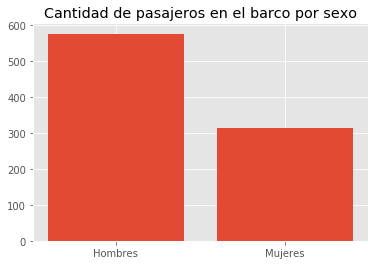

In [23]:
# hombres/mujeres entre los tripulantes

male = df_cleaned.query("Sex_male == 1")
female = df_cleaned.query("Sex_female == 1")

print("Cantidad de hombres: ", male.shape[0])
print("Cantidad de mujeres: ", female.shape[0])
print("Cantidad total de pasajeros: ", df_original.shape[0])


# graficando en un bar plot
plot_with_bar(values = [male.shape[0], female.shape[0]], 
              title = "Cantidad de pasajeros en el barco por sexo", 
              xticks = ["Hombres", "Mujeres"])

('Total mujeres pasajeros: ', 314)
('Mujeres sobrevivieron: ', 233)
('Mujeres no sobrevivieron: ', 81)


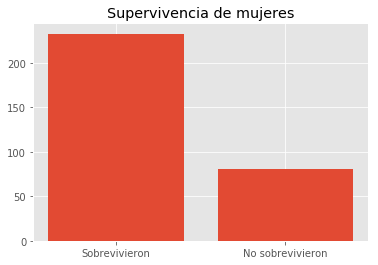

In [27]:
# del total de mujeres, cuantas sobrevivieron y cuantas no.
females_survived = df_cleaned.query("Survived == 1 and Sex_female == 1")
females_not_survived = df_cleaned.query("Survived == 0 and Sex_female == 1")


print("Total mujeres pasajeros: ", female.shape[0])
print("Mujeres sobrevivieron: ", females_survived.shape[0])
print("Mujeres no sobrevivieron: ", females_not_survived.shape[0])
plot_with_bar(values = [females_survived.shape[0], females_not_survived.shape[0]], 
              title = "Supervivencia de mujeres", 
              xticks = ["Sobrevivieron", "No sobrevivieron"])

In [40]:
# clasifiquemos 3 grupos por edad

df_cleaned["Age"].describe()


# children = df_cleaned.query("Age < 18")
# adults = df_cleaned.query("Age >= 18 and Age <= 55")
# elder = df_cleaned.query("Age > 55 and Age <= 80")

# children.shape[0]
#adults.shape[0]
#elder.shape[0]

# grafica de los datos según edad
# plot_with_bar(values = [children.shape[0], adults.shape[0], elder.shape[0]],
#               title = "Edades por categorias",
#               xticks = ["Niños", "Adultos", "3ra edad"])

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Age, dtype: float64

('Tres tipos de clases: ', array([3, 1, 2]))


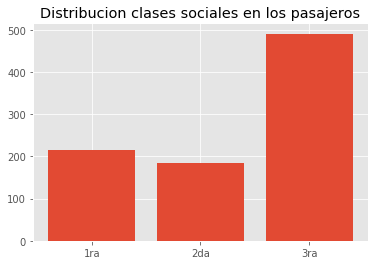

In [38]:
# los tipos de clases que habían
print("Tres tipos de clases: ", df_cleaned["Pclass"].unique())

first_class = df_cleaned.query("Pclass == 1")
second_class = df_cleaned.query("Pclass == 2")
third_class = df_cleaned.query("Pclass == 3")

# graficando
plot_with_bar(values = [first_class.shape[0], second_class.shape[0], third_class.shape[0]],
              title = "Clases sociales de los pasajeros",
              xticks = ["1ra", "2da", "3ra"])

<h2> Machine Learning

# TODO 
evaluar diferentes modelos para la predicción si el pasajero sobrevivirá o no

<h2> Evaluación

# TODO
aplicar métodos de evaluación y revisar el porcentaje de accuracy |
una vez completado... usar el testing set provisto por Kaggle para conocer el valor de accuracy final y es posible subir esta solución a la plataforma de Kaggle